<header style="width:100%;position:relative">
  <div style="width:80%;float:right;">
    <h1>False Political Claim Detection</h1>
    <h3>Selección de características y preprocesado</h3>
    <h5>Grupo 2</h5>
  </div>
        <img style="width:15%;" src="images/logo.jpg" alt="UPM" />
</header>

# Índice

1. [Importar librerias](#1.-Importar-librerias)
2. [Variables globales](#2.-Variables-globales)
3. [Carga del dataframe](#3.-Carga-del-dataframe)
4. [Análisis y selección de las características](#4.-Analisis-y-seleccion-de-las-caracteristicas)
5. [Carga de los datos y división en entrenamiento y test](#5.-Carga-de-los-datos-y-division-en-entrenamiento-y-test)
6. [Preprocesado de los datos](#6.-Preprocesado-de-los-datos)
    * 6.1 [Introducción](#6.1-Introduccion)
    * 6.2 [Casos de preprocesado](#6.2-Casos-de-preprocesado)
    * 6.3 [Conclusiones](#6.3-Conclusiones)
7. [Referencias](#7.-Referencias)


## 1. Importar librerias

In [5]:
# General import and load data
import pandas as pd
import numpy as np

# Resampling
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

# Preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

# Splitting
from sklearn.model_selection import train_test_split

# Estimators
from sklearn.ensemble import RandomForestClassifier

# Evaluation
from sklearn.metrics import classification_report

# Visualization
import matplotlib.pyplot as plt

print("Todas las librerias fueron correctamente importadas.")

Todas las librerias fueron correctamente importadas.


## 2. Variables globales

Se fija un *seed* para todo el documento para fijar la aleatoriedad y así obtener resultados replicables.

In [8]:
seed = 42

## 3. Carga del dataframe

Se cargan los datos de la ruta *formated/train_exportado.csv*, los cuales son los datos ya procesados por uno de nuestros compañeros.

In [11]:
url = "formated/train_exportado.csv"
df = pd.read_csv(url)

print("Datos cargados correctamente\n")

Datos cargados correctamente



Se observan las dimensiones del *dataframe*.

In [13]:
print(f"Dimensiones del conjunto de datos: {df.shape[0]} filas y {df.shape[1]} columnas")

Dimensiones del conjunto de datos: 8950 filas y 32 columnas


## 4. Analisis y seleccion de las caracteristicas

Se configura pandas para que muestre todas las columnas y después se realiza un head para ver el contenido de las mismas.

In [16]:
pd.set_option('display.max_columns', None)
df.head()

,id,label,statement,statement-raw,statement-lemmatize,statement-ner,feelings,subject-ciencia_y_tecnologia,subject-economia_y_finanzas,subject-educacion,subject-medio_ambiente_y_energia,subject-otros,subject-politica_y_gobierno,subject-relaciones_internacionales,subject-salud_y_bienestar,subject-seguridad_y_justicia,subject-sociedad_y_cultura,subject-trabajo_y_empleo,speaker_grouped,speaker_grouped_cod,speaker_job_grouped,speaker_job_grouped_cod,state_info_grouped,state_info_grouped_cod,party_group,party_group_cod,speaker_job-llm,speaker_job_cod-llm,state_info-llm,state_info_cod-llm,party_affiliation-llm,party_affiliation_cod-llm
0,81f884c64a7,1,China is South China Sea military fortress lik...,china is south china sea military fortress lik...,china be south china sea military fortress lik...,china south china sea,0.4215,0,0,0,0,0,0,1,0,0,0,0,donald-trump,2,president,13,new york,7,republican,6,president,639,new york,7,republican,6
1,30c2723a188,0,resources it takes execute months Iraq war we ...,resources it takes execute months iraq war we ...,resources it take execute months iraq war we f...,months iraq bush,-0.4767,0,0,0,0,0,0,0,1,0,0,0,other_speakers,7,federal_legislator_senate,4,other_state_info,10,democrat,0,federal_legislator_senate,326,other,10,democrat,0
2,6936b216e5d,0,Wisconsin governor proposed tax giveaways corp...,wisconsin governor proposed tax giveaways corp...,wisconsin governor propose tax giveaways corpo...,wisconsin,0.0000,0,1,0,0,1,0,0,0,0,1,0,other_speakers,7,other_speaker_job,9,washington dc,14,democrat,0,political_commentator,629,washington dc,14,democrat,0
3,b5cd9195738,1,Says her representation ex boyfriend who was m...,says her representation ex boyfriend who was m...,say her representation ex boyfriend who be my ...,(no entities),0.4939,0,0,1,0,0,1,0,0,1,1,0,other_speakers,7,other_speaker_job,9,other_state_info,10,independent_None,1,political_organization,634,other,10,official,3
4,84f8dac7737,0,protests Wisconsin proposed collective bargain...,protests wisconsin proposed collective bargain...,protests wisconsin propose collective bargaini...,wisconsin,-0.5994,0,1,0,0,0,0,0,1,0,0,1,other_speakers,7,other_speaker_job,9,wisconsin,15,republican,6,political_organization,634,wisconsin,15,republican,6


Se muestran todas las columnas para poder observarlas.

In [18]:
df.columns

Index(['id', 'label', 'statement', 'statement-raw', 'statement-lemmatize',
       'statement-ner', 'feelings', 'subject-ciencia_y_tecnologia',
       'subject-economia_y_finanzas', 'subject-educacion',
       'subject-medio_ambiente_y_energia', 'subject-otros',
       'subject-politica_y_gobierno', 'subject-relaciones_internacionales',
       'subject-salud_y_bienestar', 'subject-seguridad_y_justicia',
       'subject-sociedad_y_cultura', 'subject-trabajo_y_empleo',
       'speaker_grouped', 'speaker_grouped_cod', 'speaker_job_grouped',
       'speaker_job_grouped_cod', 'state_info_grouped',
       'state_info_grouped_cod', 'party_group', 'party_group_cod',
       'speaker_job-llm', 'speaker_job_cod-llm', 'state_info-llm',
       'state_info_cod-llm', 'party_affiliation-llm',
       'party_affiliation_cod-llm'],
      dtype='object')

Se muestran todas las columnas en formato código para que sea más sencillo su uso. Además se estructuran en diversas categorias.

In [20]:
all_features = [
    # Identificador
    'id',

    # Etiqueta objetivo
    'label',

    # Texto original y procesado
    'statement', 'statement-raw', 'statement-lemmatize', 

    # Features derivados del texto
    'statement-ner', 'feelings',

    # One-hot encoded de los temas reagrupados del texto 
    'subject-ciencia_y_tecnologia', 'subject-economia_y_finanzas',
    'subject-educacion', 'subject-medio_ambiente_y_energia', 'subject-otros',
    'subject-politica_y_gobierno', 'subject-relaciones_internacionales',
    'subject-salud_y_bienestar', 'subject-seguridad_y_justicia',
    'subject-sociedad_y_cultura', 'subject-trabajo_y_empleo',

    # Resto de las categoricas agrupadas
    'speaker_grouped', 'speaker_job_grouped', 'state_info_grouped', 'party_group',

    # Resto de las categoricas agrupadas y codificadas
    'speaker_grouped_cod', 'speaker_job_grouped_cod',
    'state_info_grouped_cod', 'party_group_cod',

    # Variables generadas por LLM los null
    'speaker_job-llm', 'speaker_job_cod-llm',
    'state_info-llm', 'state_info_cod-llm',
    'party_affiliation-llm', 'party_affiliation_cod-llm'
]

Se seleccionan todas las categorias menos: 
* ***id***: no aporta ningún valor.
* ***label***: variable a predecir.
* ***statement***: esta *feature* esta por si nos es necesario en algun momento futuro tener el texto sin procesar.
* ***statement-lemmatize***: esta *feature* solo esta para probar en notebooks posteriores si clasifica mejor o peor con las raices de las palabras.
* ***statement-ner***: esta *feature* esta para ver si el clasificador funciona mejor con el NER por separado.
* ***speaker_grouped***, ***speaker_job_grouped***, ***state_info_grouped***, ***party_group***: suponemos que tenemos la misma información ya codificada.
* ***speaker_job-llm***, ***speaker_job_cod-llm***, ***state_info-llm***, ***state_info_cod-llm***, ***party_affiliation-llm***, ***party_affiliation_cod-llm***: esta información ya esta en otras *features*, la diferencia esta en como se tratan los nulos asi que se analizará cual funciona mejor si con LLM o sin ellos durante el apartado de clasificación.

In [22]:
selected_features = [
    # Texto
    'statement-raw',

    # Features derivados del texto
    'feelings',

    # One-hot encoded de los temas reagrupados del texto 
    'subject-ciencia_y_tecnologia', 'subject-economia_y_finanzas',
    'subject-educacion', 'subject-medio_ambiente_y_energia', 'subject-otros',
    'subject-politica_y_gobierno', 'subject-relaciones_internacionales',
    'subject-salud_y_bienestar', 'subject-seguridad_y_justicia',
    'subject-sociedad_y_cultura', 'subject-trabajo_y_empleo',

    # Resto de las categoricas agrupadas y codificadas
    'speaker_grouped_cod', 'speaker_job_grouped_cod',
    'state_info_grouped_cod', 'party_group_cod'
]

De las cuales, no se corresponden con el texto.

In [24]:
no_text = [
    # Features derivados del texto
    'feelings',

    # One-hot encoded de los temas reagrupados del texto 
    'subject-ciencia_y_tecnologia', 'subject-economia_y_finanzas',
    'subject-educacion', 'subject-medio_ambiente_y_energia', 'subject-otros',
    'subject-politica_y_gobierno', 'subject-relaciones_internacionales',
    'subject-salud_y_bienestar', 'subject-seguridad_y_justicia',
    'subject-sociedad_y_cultura', 'subject-trabajo_y_empleo',

    # Resto de las categoricas agrupadas y codificadas
    'speaker_grouped_cod', 'speaker_job_grouped_cod',
    'state_info_grouped_cod', 'party_group_cod'
]

De las cuales, numéricas (y sin normalizar) solamente son las codificadas:

In [26]:
numeric_vars = [
    'speaker_grouped_cod', 'speaker_job_grouped_cod',
    'state_info_grouped_cod', 'party_group_cod'
]

Comprobamos que solo tenemos tipos númericos, más especificamente enteros.

In [28]:
df[selected_features].dtypes

statement-raw                          object
feelings                              float64
subject-ciencia_y_tecnologia            int64
subject-economia_y_finanzas             int64
subject-educacion                       int64
subject-medio_ambiente_y_energia        int64
subject-otros                           int64
subject-politica_y_gobierno             int64
subject-relaciones_internacionales      int64
subject-salud_y_bienestar               int64
subject-seguridad_y_justicia            int64
subject-sociedad_y_cultura              int64
subject-trabajo_y_empleo                int64
speaker_grouped_cod                     int64
speaker_job_grouped_cod                 int64
state_info_grouped_cod                  int64
party_group_cod                         int64
dtype: object

Volvemos a observar el *dataframe* pero solamente con las *features* seleccionadas.

In [30]:
df[selected_features].head()

,statement-raw,feelings,subject-ciencia_y_tecnologia,subject-economia_y_finanzas,subject-educacion,subject-medio_ambiente_y_energia,subject-otros,subject-politica_y_gobierno,subject-relaciones_internacionales,subject-salud_y_bienestar,subject-seguridad_y_justicia,subject-sociedad_y_cultura,subject-trabajo_y_empleo,speaker_grouped_cod,speaker_job_grouped_cod,state_info_grouped_cod,party_group_cod
0,china is south china sea military fortress lik...,0.4215,0,0,0,0,0,0,1,0,0,0,0,2,13,7,6
1,resources it takes execute months iraq war we ...,-0.4767,0,0,0,0,0,0,0,1,0,0,0,7,4,10,0
2,wisconsin governor proposed tax giveaways corp...,0.0000,0,1,0,0,1,0,0,0,0,1,0,7,9,14,0
3,says her representation ex boyfriend who was m...,0.4939,0,0,1,0,0,1,0,0,1,1,0,7,9,10,1
4,protests wisconsin proposed collective bargain...,-0.5994,0,1,0,0,0,0,0,1,0,0,1,7,9,15,6


## 5. Carga de los datos y division en entrenamiento y test

Cargamos las caracteristicas seleccionadas en la variable X y el objetivo *Accept* en la variable y.

In [33]:
X = df[selected_features] 
y = df['label']

Mostramos las dimensiones de ambas variables.

In [35]:
print(f"Dimensiones del conjunto de datos: {X.shape[0]} filas y {X.shape[1]} columnas")
print(f"Dimensiones del conjunto de datos: {y.shape[0]} filas y 1 columna")

Dimensiones del conjunto de datos: 8950 filas y 17 columnas
Dimensiones del conjunto de datos: 8950 filas y 1 columna


Obtenemos la distribución del objetivo *label*.

In [37]:
# Calcular los conteos de valores
counts = pd.Series(y).value_counts()

# Calcular los porcentajes
percentages = (counts / len(y)) * 100

# Mostrar los resultados
print(percentages)

label
1    64.748603
0    35.251397
Name: count, dtype: float64


En definitiva, observamos que esta desbalanceado, aunque menos que en el primer *challenge*.

Se separa ya en entrenamiento y test para no falsear los datos del test al realizar el balanceo.

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

## 6. Preprocesado de los datos

### 6.1 Introduccion

Durante el anterior *challenge*, nos dimos cuenta que fue un error realizar la selección de clasificadores antes de uniformar el preprocesado de los mismos. Por ello, esta vez este *notebook* se está realizando antes.

Se va a reutilizar el trabajo realizado en el anterior *challenge*, adaptándolo a las nuevas necesidades de este reto. En esta ocasión, todos los preprocesamientos requieren aplicar TF-IDF sobre el statement para que pueda ser clasificado correctamente. Además, se continuará utilizando *SMOTE* y *RandomUnderSampler* para equilibrar el conjunto de entrenamiento, teniendo en cuenta que, como se comentó en el apartado anterior, este dataset no presenta un desbalance tan acusado.

Para reducir la dimensionalidad tras aplicar la TF-IDF se utilizaba una *PCA* (ya que es lo que se utilizó para el primer *challenge*). Tras avanzar en las clases teóricas vimos que para el procesamiento de texto funciona mejor aplicar técnicas de *LSA*, por ello cambiamos el uso de la *PCA* por una reducción por *SVD* de *sklearn*, especificamente *TruncatedSVD*.

Además, en el notebook referido a este mismo apartado del anterior *challenge* se utilizaba un K-fold para evaluar los distintos preprocesados. Como ya nos dimos en cuenta el usar *SMOTE* falseaba dichos resultados ya que generaba más valores de la clase minoritaria pero al ser tan similares los adivinaba mucho mejor de lo que realmente lo hacia con los datos nuevos. Por ello esta vez se va a evaluar directamente con el *train_test_split*. Hay que tener en cuenta que esto otorga otros inconvenientes como tener unos resultados con una mayor varianza y menos fiables.

Se va a añadir "_S" o "_N" para si se estandarizan o no los variables codificadas y "_O", "_U" y "_OU" como en el anetrio *challenge* para el remuestreo, quedando por lo tanto los siguientes casos de preprocesado.
* *_S_O*&nbsp;:&nbsp;&nbsp;*_Standard_Over*, es decir, se estandarizan las variables codificadas y se realiza solamente oversampling.
* *_N_O*&nbsp;:&nbsp;&nbsp;*_NonStandard_Over*, es decir, no se estandariza nada y se realiza solamente oversampling.
* *_S_U*&nbsp;:&nbsp;&nbsp;*_Standard_Under*, es decir, se estandarizan las variables codificadas y se realiza solamente undersampling.
* *_N_U*&nbsp;:&nbsp;&nbsp;*_NonStandard_Under*, es decir, no se estandariza nada y se realiza solamente undersampling.
* *_S_OU*&nbsp;:&nbsp;&nbsp;*_Standard_OverUnder*, es decir, se estandarizan las variables codificadas y se realiza tanto oversampling como undersampling.
* *_N_OU*&nbsp;:&nbsp;&nbsp;*_NonStandard_UnderOver*, es decir, no se estandariza nada y se realiza tanto oversampling como undersampling.

También cabe mencionar, que se empezó a ejecutar el primer caso pero tardaba demasiado tiempo en hacer la reducción de dimensionalidad. Esto se debe a que estabamos introduciendo 9000 features tras aplicar el TF-IDF. 

Por ello, se decidió añadir los parámetros *min_df* para fijar el número de documentos en los que al menos debia aparecer, *max_df* el porcentaje de frencuencía máximo que debia aparecer (no hacia nada ya que durante la limpieza de los datos ya se quitaron las *stopwords* que es lo que se suele eliminar con ello) y *ngram_range* para no analizar solamente palabras sino también parejas de palabras. 

Además se añadio un *n_components* en el *TruncatedSVD* para recortar bastante tiempo. La idea era quedarnos con un ratio de explicabilidad entorno al 65% y el 85% (un valor más alto no reduciría casi dimensionalidad), asi que fijamos un *n_components* a 1000. Con este valor nos orientamos de forma aproximada de cuanto podemos aumentarlo para fijar bien el ratio. Si pusieramos un valor superior a 4000 sería absurdo porque superaría con creces el ratio , y aumentaría con ello el tiempo de ejecución, para posteriormente recortar el número de componentes.

Asimismo, se pensó que era mejor aplicar la reducción de dimensionalidad a las *features* resultantes del TF-IDF por separado. Esto se debe a que al ser tantas columnas pensamos que podría provocar que se perdiese la información del resto de *features*.

### 6.2 Casos de preprocesado

#### - Tratamiento común

Tratamos solamente el texto del conjunto de train y test.

Primero vemos las dimensiones para corroborar que solo hemos cogido el texto.

In [48]:
print(f"Dimensiones del conjunto de datos: {X_train['statement-raw'].shape[0]} filas y 1 columna")
print(f"Dimensiones del conjunto de datos: {X_test['statement-raw'].shape[0]} filas y 1 columna")

Dimensiones del conjunto de datos: 7160 filas y 1 columna
Dimensiones del conjunto de datos: 1790 filas y 1 columna


Después, aplicamos el *TF-IDF*.

In [50]:
vectorizador = TfidfVectorizer(min_df=5, max_df=0.8, ngram_range=(1,2))
vectorizador.fit(X_train['statement-raw'])

X_text_train = vectorizador.transform(X_train['statement-raw'])
X_text_test = vectorizador.transform(X_test['statement-raw'])

Corroboramos las dimensiones tras aplicar el *TF-IDF*.

In [52]:
print(f"Dimensiones del conjunto de datos: {X_text_train.shape[0]} filas y {X_text_train.shape[1]} columnas")
print(f"Dimensiones del conjunto de datos: {X_text_test.shape[0]} filas y {X_text_test.shape[1]} columnas")

Dimensiones del conjunto de datos: 7160 filas y 3657 columnas
Dimensiones del conjunto de datos: 1790 filas y 3657 columnas


Aplicamos un *SVD* para reducir la dimensionalidad.

In [54]:
svd = TruncatedSVD(n_components=1000, random_state=seed)
svd.fit(X_text_train)

X_svd_full_train = svd.transform(X_text_train)
X_svd_full_test = svd.transform(X_text_test)

Buscamos quedarnos solamente con los componentes que nos permitan tener un de ratio de explicabilidad determinado.

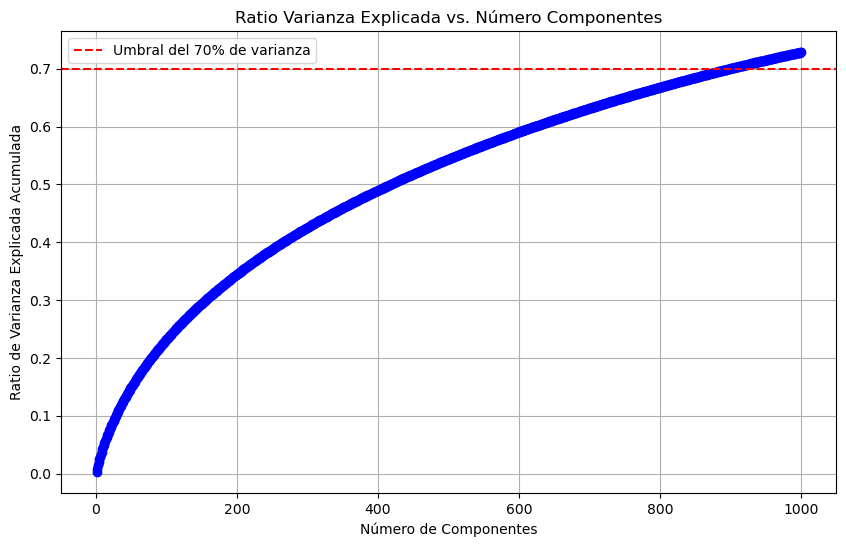

In [56]:
# Calculate cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(svd.explained_variance_ratio_)

# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), 
         cumulative_variance_ratio, 'bo-')
plt.xlabel('Número de Componentes')
plt.ylabel('Ratio de Varianza Explicada Acumulada')
plt.title('Ratio Varianza Explicada vs. Número Componentes')
plt.grid(True)

# Add threshold line
plt.axhline(y=0.7, color='r', linestyle='--', 
            label='Umbral del 70% de varianza')
plt.legend()
plt.show()

Y ahora, seleccionamos el número de componentes, así como el desglose que aporta cada uno de ellos al ratio de  explicabilidad.

In [58]:
n_comp = np.argmax(cumulative_variance_ratio >= 0.7) + 1
print(f"Número de componentes seleccionados: {n_comp}")
print(f"Varianza explicada con {n_comp} componentes: "
      f"{cumulative_variance_ratio[n_comp-1]:.4f}")

# Display variance explained by each component
print("\nVarianza explicada por cada componente:")
for i, var in enumerate(svd.explained_variance_ratio_[:n_comp]):
    print(f"Componente {i+1}: {var:.4f} ({var*100:.2f}%)")

Número de componentes seleccionados: 898
Varianza explicada con 898 componentes: 0.7001

Varianza explicada por cada componente:
Componente 1: 0.0023 (0.23%)
Componente 2: 0.0064 (0.64%)
Componente 3: 0.0062 (0.62%)
Componente 4: 0.0051 (0.51%)
Componente 5: 0.0047 (0.47%)
Componente 6: 0.0046 (0.46%)
Componente 7: 0.0043 (0.43%)
Componente 8: 0.0042 (0.42%)
Componente 9: 0.0039 (0.39%)
Componente 10: 0.0038 (0.38%)
Componente 11: 0.0036 (0.36%)
Componente 12: 0.0035 (0.35%)
Componente 13: 0.0034 (0.34%)
Componente 14: 0.0033 (0.33%)
Componente 15: 0.0032 (0.32%)
Componente 16: 0.0032 (0.32%)
Componente 17: 0.0030 (0.30%)
Componente 18: 0.0030 (0.30%)
Componente 19: 0.0030 (0.30%)
Componente 20: 0.0029 (0.29%)
Componente 21: 0.0028 (0.28%)
Componente 22: 0.0028 (0.28%)
Componente 23: 0.0028 (0.28%)
Componente 24: 0.0027 (0.27%)
Componente 25: 0.0027 (0.27%)
Componente 26: 0.0027 (0.27%)
Componente 27: 0.0026 (0.26%)
Componente 28: 0.0026 (0.26%)
Componente 29: 0.0026 (0.26%)
Componente

Finalmente, nos quedamos con el conjunto de componentes deseado.

In [60]:
X_svd_train = X_svd_full_train[:, :n_comp]
X_svd_test = X_svd_full_test[:, :n_comp]

Una vez finalizado elt ratamiento del texto, volvemos a juntarlo al resto de carácteristicas.

In [62]:
# Train
X_svd_train = pd.DataFrame(X_svd_train, columns=[f"svd_{i}" for i in range(X_svd_train.shape[1])])
X_rest_train = X_train[no_text].reset_index(drop=True)

# Test
X_svd_test = pd.DataFrame(X_svd_test, columns=[f"svd_{i}" for i in range(X_svd_test.shape[1])])
X_rest_test = X_test[no_text].reset_index(drop=True)

# Text + Resto de features
X_final_train = pd.concat([X_svd_train, X_rest_train], axis=1)
X_final_test = pd.concat([X_svd_test, X_rest_test], axis=1)

#### - Caso 1: Estandarización de todas las features codificadas y oversampling

Primero escalamos *X* con el escalador estándar.

In [65]:
prep_S_O = ColumnTransformer([
    ('numericas', StandardScaler(), numeric_vars)
], remainder='passthrough').fit(X_final_train) 

X_scaled_S_O = prep_S_O.transform(X_final_train)
X_test_S_O = prep_S_O.transform(X_final_test)

Después realizamos un SMOTE para obtener una proporción 50-50.

In [67]:
over_S_O = SMOTE(random_state=seed)
X_resampled_S_O, y_resampled_S_O = over_S_O.fit_resample(X_scaled_S_O, y_train)

Comprobamos el balanceo de los datos.

In [69]:
# Calcular los conteos de valores
counts = pd.Series(y_resampled_S_O).value_counts()

# Calcular los porcentajes
percentages = (counts / len(y_resampled_S_O)) * 100

# Mostrar los resultados
print(percentages)

label
1    50.0
0    50.0
Name: count, dtype: float64


#### - Caso 2: Sin estandarización y con oversampling

Volvemos a realizar un oversampling con *SMOTE* por defecto.

In [72]:
over_N_O = SMOTE(random_state=seed)
X_resampled_N_O, y_resampled_N_O = over_N_O.fit_resample(X_final_train, y_train)

Comprobamos el balanceo de los datos.

In [74]:
# Calcular los conteos de valores
counts = pd.Series(y_resampled_N_O).value_counts()

# Calcular los porcentajes
percentages = (counts / len(y_resampled_N_O)) * 100

# Mostrar los resultados
print(percentages)

label
1    50.0
0    50.0
Name: count, dtype: float64


#### - Caso 3: Estandarización de todas las features codificadas y undersampling

Primero escalamos X con el escalador estándar.

In [77]:
prep_S_U = ColumnTransformer([
    ('numericas', StandardScaler(), numeric_vars)
], remainder='passthrough').fit(X_final_train) 

X_scaled_S_U = prep_S_U.transform(X_final_train)
X_test_S_U = prep_S_U.transform(X_final_test)

Esta vez, aplicamos un undersampling de los datos.

In [79]:
under_S_U = RandomUnderSampler(sampling_strategy=0.7, random_state=seed)
X_resampled_S_U, y_resampled_S_U = under_S_U.fit_resample(X_scaled_S_U, y_train)

Comprobamos el balanceo de los datos.

In [81]:
# Calcular los conteos de valores
counts = pd.Series(y_resampled_S_U).value_counts()

# Calcular los porcentajes
percentages = (counts / len(y_resampled_S_U)) * 100

# Mostrar los resultados
print(percentages)

label
1    58.821625
0    41.178375
Name: count, dtype: float64


#### - Caso 4: Sin estandarización y con undersampling

Volvemos a realizar un undersampling con *RandomUnderSampler*.

In [84]:
under_N_U = RandomUnderSampler(sampling_strategy=0.8, random_state=seed)
X_resampled_N_U, y_resampled_N_U = under_N_U.fit_resample(X_final_train, y_train)

Comprobamos el balanceo de los datos.

In [86]:
# Calcular los conteos de valores
counts = pd.Series(y_resampled_N_U).value_counts()

# Calcular los porcentajes
percentages = (counts / len(y_resampled_N_U)) * 100

# Mostrar los resultados
print(percentages)

label
1    55.555556
0    44.444444
Name: count, dtype: float64


#### - Caso 5: Estandarización de todas las features codificadas y under- y oversampling

Primero escalamos *X* con el escalador estándar.

In [89]:
prep_S_OU = ColumnTransformer([
    ('numericas', StandardScaler(), numeric_vars)
], remainder='passthrough').fit(X_final_train) 

X_scaled_S_OU = prep_S_OU.transform(X_final_train)
X_test_S_OU = prep_S_OU.transform(X_final_test)

Esta vez, hacemos previamente un undersampling de los datos, buscando no ser tan agresivos al balancear el conjunto.

In [91]:
under_S_OU = RandomUnderSampler(sampling_strategy=0.65, random_state=seed)
X_under_S_OU, y_under_S_OU = under_S_OU.fit_resample(X_scaled_S_OU, y_train)

Comprobamos el balanceo de los datos.

In [93]:
# Calcular los conteos de valores
counts = pd.Series(y_under_S_OU).value_counts()

# Calcular los porcentajes
percentages = (counts / len(y_under_S_OU)) * 100

# Mostrar los resultados
print(percentages)

label
1    60.600898
0    39.399102
Name: count, dtype: float64


Después realizamos un SMOTE para obtener una proporción más equitativa.

In [95]:
over_S_OU = SMOTE(sampling_strategy=0.8, random_state=seed)
X_resampled_S_OU, y_resampled_S_OU = over_S_OU.fit_resample(X_under_S_OU, y_under_S_OU)

Y volvemos a comprobar el balanceo de los datos.

In [97]:
# Calcular los conteos de valores
counts = pd.Series(y_resampled_S_OU).value_counts()

# Calcular los porcentajes
percentages = (counts / len(y_resampled_S_OU)) * 100

# Mostrar los resultados
print(percentages)

label
1    55.558711
0    44.441289
Name: count, dtype: float64


#### - Caso 6: Sin estandarización y con under- y oversampling

Se vuelve a realizar el balanceo en dos pasos.

In [100]:
# Undersampling
under_N_OU = RandomUnderSampler(sampling_strategy=0.65, random_state=seed)
X_under_N_OU, y_under_N_OU = under_N_OU.fit_resample(X_final_train, y_train)

# Oversampling
over_N_OU = SMOTE(sampling_strategy=0.8, random_state=seed)
X_resampled_N_OU, y_resampled_N_OU = over_N_OU.fit_resample(X_under_N_OU, y_under_N_OU)

Y volvemos a comprobar el balanceo de los datos.

In [102]:
# Calcular los conteos de valores
counts = pd.Series(y_resampled_N_OU).value_counts()

# Calcular los porcentajes
percentages = (counts / len(y_resampled_N_OU)) * 100

# Mostrar los resultados
print(percentages)

label
1    55.558711
0    44.441289
Name: count, dtype: float64


#### - Evaluación

Creamos el modelo *Random Forest* que se utilizará para evaluar los distintos preprocesados.

In [105]:
model_Forest  = RandomForestClassifier(class_weight="balanced", n_jobs=-1, random_state=seed)

* **Caso 1: Estandarización de todas las features codificadas y oversampling**

Entrenamos el modelo con los datos del caso 1.

In [108]:
model_Forest.fit(X_resampled_S_O, y_resampled_S_O)

predicted_S_O = model_Forest.predict(X_test_S_O)
expected_S_O = y_test

Y observamos su reporte de clasificación.

In [110]:
print(classification_report(expected_S_O, predicted_S_O))

              precision    recall  f1-score   support

           0       0.38      0.40      0.39       611
           1       0.68      0.66      0.67      1179

    accuracy                           0.57      1790
   macro avg       0.53      0.53      0.53      1790
weighted avg       0.58      0.57      0.58      1790



* **Caso 2: Sin estandarización y con oversampling**

Entrenamos el modelo con los datos del caso 2.

In [113]:
model_Forest.fit(X_resampled_N_O, y_resampled_N_O)

predicted_N_O = model_Forest.predict(X_final_test)
expected_N_O = y_test

Y observamos su reporte de clasificación.

In [115]:
print(classification_report(expected_N_O, predicted_N_O))

              precision    recall  f1-score   support

           0       0.37      0.40      0.39       611
           1       0.68      0.65      0.66      1179

    accuracy                           0.56      1790
   macro avg       0.52      0.52      0.52      1790
weighted avg       0.57      0.56      0.57      1790



* **Caso 3: Estandarización de todas las features codificadas y undersampling**

Entrenamos el modelo con los datos del caso 3.

In [118]:
model_Forest.fit(X_resampled_S_U, y_resampled_S_U)

predicted_S_U = model_Forest.predict(X_test_S_U)
expected_S_U = y_test

Y observamos su reporte de clasificación.

In [120]:
print(classification_report(expected_S_U, predicted_S_U))

              precision    recall  f1-score   support

           0       0.45      0.15      0.22       611
           1       0.67      0.91      0.77      1179

    accuracy                           0.65      1790
   macro avg       0.56      0.53      0.50      1790
weighted avg       0.59      0.65      0.58      1790



* **Caso 4: Sin estandarización y con undersampling**

Entrenamos el modelo con los datos del caso 4.

In [123]:
model_Forest.fit(X_resampled_N_U, y_resampled_N_U)

predicted_N_U = model_Forest.predict(X_final_test)
expected_N_U = y_test

Y observamos su reporte de clasificación.

In [125]:
print(classification_report(expected_N_U, predicted_N_U))

              precision    recall  f1-score   support

           0       0.43      0.30      0.35       611
           1       0.69      0.80      0.74      1179

    accuracy                           0.63      1790
   macro avg       0.56      0.55      0.55      1790
weighted avg       0.60      0.63      0.61      1790



* **Caso 5: Estandarización de todas las features codificadas y under- y oversampling**

Entrenamos el modelo con los datos del caso 5.

In [128]:
model_Forest.fit(X_resampled_S_OU, y_resampled_S_OU)

predicted_S_OU = model_Forest.predict(X_test_S_OU)
expected_S_OU = y_test

Y observamos su reporte de clasificación.

In [130]:
print(classification_report(expected_S_OU, predicted_S_OU))

              precision    recall  f1-score   support

           0       0.41      0.27      0.33       611
           1       0.68      0.79      0.73      1179

    accuracy                           0.62      1790
   macro avg       0.54      0.53      0.53      1790
weighted avg       0.59      0.62      0.59      1790



* **Caso 6: Sin estandarización y con under- y oversampling**

Entrenamos el modelo con los datos del caso 6.

In [133]:
model_Forest.fit(X_resampled_N_OU, y_resampled_N_OU)

predicted_N_OU = model_Forest.predict(X_final_test)
expected_N_OU = y_test

Y observamos su reporte de clasificación.

In [135]:
print(classification_report(expected_N_OU, predicted_N_OU))

              precision    recall  f1-score   support

           0       0.42      0.30      0.35       611
           1       0.68      0.78      0.73      1179

    accuracy                           0.62      1790
   macro avg       0.55      0.54      0.54      1790
weighted avg       0.59      0.62      0.60      1790



### 6.3 Conclusiones

Al contrario de lo que ocurría en el anterior *challenge*, en este caso si que se observa que es mejor el caso 5 y 6 frente a los demás, tanto por *accurracy* como por el *f1-score* en los 0s. Además, en este *challenge* es menos importante balancear el dataset, ya que hay una diferencia menor entre ambas posibilidades (en el anterior eran 80% de 1s y 20% de 0s y en este la proporción es del 65% de 1s frente al 35% de 0s).

Por ello, se ha decidido que, a diferencia del anterior *challenge*, en los siguientes apartados se continuará únicamente con un único caso de preprocesamiento: el caso 5. Esta elección se debe a que, aunque su rendimiento fue ligeramente inferior al del caso 6, consideramos que estandarizar las variables codificadas podría ser más beneficioso con ciertos clasificadores. En caso de que los mejores modelos resulten ser clasificadores basados en árboles de decisión, se retomará el caso 6 para comprobar si ofrece una mejora en ese contexto.

A su vez, como no se ha conseguido reducir en demasía la dimensionalidad se ha pensado probar *word2vec* para procesar el texto.

# 7. Referencias

* [ColumnTransformer. (s. f.). Scikit-learn.](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html)
* [RandomForestClassifier. (s. f.). Scikit-learn.](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
* [RandomUnderSampler — Version 0.13.0. (s. f.). Imbalance learn.](https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html)
* [SMOTE — Version 0.13.0. (s. f.). Imbalanced learn.](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html)
* [StandardScaler. (s. f.). Scikit-learn.](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
* [TfidfVectorizer. (s. f.). Scikit-learn.](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)
* [train_test_split. (s. f.). Scikit-learn.](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
* [TruncatedSVD. (s. f.). Scikit-learn.](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html)